# Plot regions of interest on template image in MNI152 space 
#### Brain visualizations by Valentina Krenz for the Manuscript "Unraveling the semantic nature of memory transformation over time" by Valentina Krenz, Arjen Alink, Tobias Sommer, Benno Roozendaal, & Lars Schwabe

## preparations

### load relevant packages

In [25]:
from nilearn import plotting, image, datasets
import matplotlib.pyplot as plt
import os

### define paths

#### path to your ROI images 

In [12]:
your_path =  "YOURPATH"

#### path to where you want to store the plots

In [13]:
output_path = your_path + "roi_plots"
if not os.path.exists(output_path):
    os.makedirs(output_path)

#### path to your mni template image

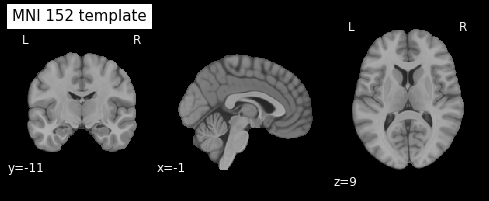

In [14]:
mni_ims = your_path + "tpl-MNI152NLin2009cAsym_res-01_desc-brain_T1w.nii.gz"

plotting.plot_anat(mni_ims, title="MNI 152 template", draw_cross=False)
plotting.show()

##### NOTE:

###### You can download this image manually or get it via the template flow, which offers multiple templates:

In [15]:
#!pip install templateflow --user
from templateflow import api
available_templates = api.templates()
print("Available templates:", available_templates)

Available templates: ['Fischer344', 'MNI152Lin', 'MNI152NLin2009aAsym', 'MNI152NLin2009aSym', 'MNI152NLin2009bAsym', 'MNI152NLin2009bSym', 'MNI152NLin2009cAsym', 'MNI152NLin2009cSym', 'MNI152NLin6Asym', 'MNI152NLin6Sym', 'MNI305', 'MNIColin27', 'MNIInfant', 'MNIPediatricAsym', 'MouseIn', 'NKI', 'NMT31Sym', 'OASIS30ANTs', 'PNC', 'RESILIENT', 'UNCInfant', 'VALiDATe29', 'WHS', 'fsLR', 'fsaverage']


##### usually saved in the user folder:

In [19]:
file_path = api.get("MNI152NLin2009cAsym", resolution=1, desc="brain", suffix="T1w")
print(f"File downloaded at: {file_path}")

File downloaded at: [WindowsPath('C:/Users/Valentina Krenz/.cache/templateflow/tpl-MNI152NLin2009cAsym/tpl-MNI152NLin2009cAsym_res-01_desc-brain_T1w.nii.gz'), WindowsPath('C:/Users/Valentina Krenz/.cache/templateflow/tpl-MNI152NLin2009cAsym/tpl-MNI152NLin2009cAsym_res-01_desc-brain_T1w.nii.nii')]


## plot anterior-posterior hippocampal axis

### read in ROI images 

In [20]:
aHC = your_path + "mainROIs/anteriorHC_L.nii"
pHC = your_path + "mainROIs/posteriorHC_L.nii"

### plot anterior and posterior hippocampus and save figure

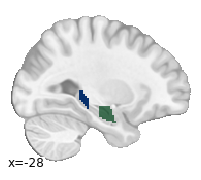

In [21]:
# display the anterior hippocampus in green on the template image
display = plotting.plot_roi(aHC,
                  bg_img=mni_ims,
                  draw_cross=False,
                  display_mode='x',
                  cut_coords=[-28],
                  cmap='Greens_r',
                  black_bg=False)

# overlay the posterior hippocampus in blue
display.add_overlay(pHC, cmap='Blues_r')

# define path to save the figure, file name and file type (here svg)
output_file = os.path.join(output_path, 'anterior_posterior.png')
# save the figure
display.savefig(output_file) # you can also save in other formats

## plot individual neocortical ROIs

### read in neocortical ROIs

In [22]:
acc = your_path + "postHocTestROIs/aCC.nii"
vmpfc = your_path + "postHocTestROIs/vmPFC.nii"
ifg = your_path + "postHocTestROIs/IFG.nii"
prec = your_path + "postHocTestROIs/Precuneus.nii"
ag_R = your_path + "postHocTestROIs/angularGyrus_R.nii"
ag_L = your_path + "postHocTestROIs/angularGyrus_L.nii"

### define titles, coordinates and view

In [23]:
rois = [vmpfc, acc, ifg, prec, ag_L, ag_R] # this defines the order of the rois
titles = ['vmpfc', 'aCC', 'IFG', 'precuneus', 'left angular gyrus', 'right angular gyrus'] # can be removed
cut_coords = [-2, 0, -50, -58, -56, -51] # slices in order of rois

### loop through rois, save figures and plot in notebook
##### NOTE: You can also plot each ROI separately using the code for the anterior hippocampus plot without overlay, adapting the variable name and adapting display_mode and cut_coords

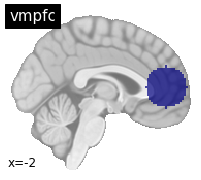

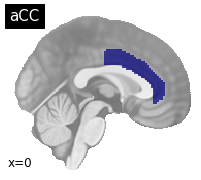

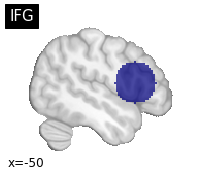

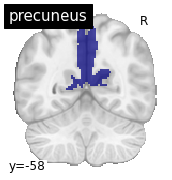

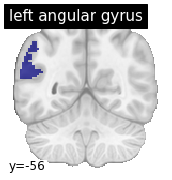

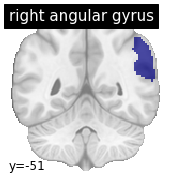

In [26]:
# loop through rois, titles and cut_coords to create a figure for each neocortical ROI
def plot_rois(rois, titles, cut_coords, display_mode, output_path):
    for i, roi in enumerate(rois):
        display = plotting.plot_roi(roi, bg_img=mni_ims, display_mode=display_mode, cut_coords=[cut_coords[i]],
                          title=titles[i], draw_cross=False, black_bg=False)
        plt.show()
        # save with ROI name, save in SVG (other formats possible)
        filename = f"{titles[i]}.svg"
        file_path = os.path.join(output_path, filename)
        display.savefig(file_path)
        display.close()
        
figsize = (10, 10) # Define the size for each figure (width, height)

# Plot and save the first three ROIs with display_mode="x"
plot_rois(rois[:3], titles[:3], cut_coords[:3], display_mode="x", output_path=output_path)

# Plot and save the last three ROIs with display_mode="y"
plot_rois(rois[3:], titles[3:], cut_coords[3:], display_mode="y", output_path=output_path)